In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics')


import pandas as pd
import numpy as np
import Basics.Data.Metrica_IO as mio
from Position_data.Tracking_Data import tracking_data
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import Position_data.PitchControl.pitch_control as pc
from Basics.Data.DFL_data import parse_dfl_pos_data

In [2]:
data_dir = 'sample-data-master/data/'
game_id = 2
away = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Away')
home = mio.tracking_data(DATADIR=data_dir, game_id=game_id, teamname='Home')
td = mio.merge_tracking_data(home, away)
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='mplsoccer')
print(td_object)
td_object.get_velocities()
td_object.data.head()

Reading team: away
Reading team: home
tracking_data object of metrica of shape (141156, 56).


,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,113.13,40.3304,77.7744,22.884,81.3024,34.2424,83.8584,44.4848,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Laurie Shaw's version (Spearman)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

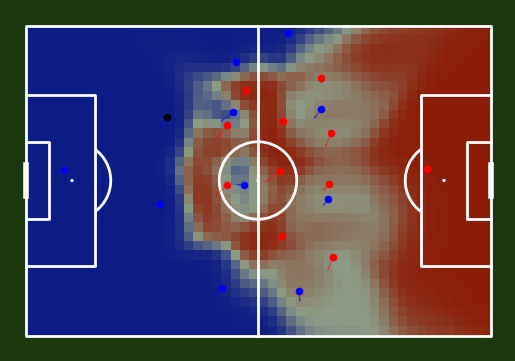

In [3]:
pc.plot_pitch_control(td_object=td_object, frame=300, velocities=True)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

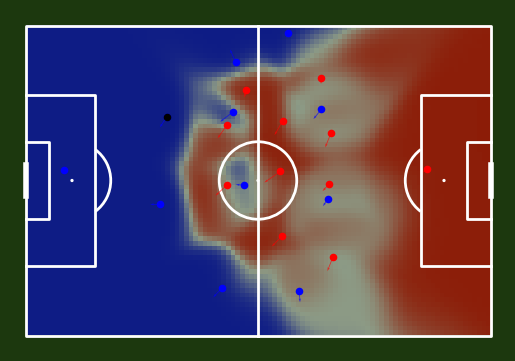

In [4]:
pc.plot_pitch_control(td_object=td_object, frame=300, velocities=True, n_grid_cells_x=100)

# Tensor based pitch control (based on anenglishgoat)

## Spearman

Modelling pitch control...
Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/2
Current batch: 2/2


(<Figure size 640x480 with 1 Axes>, <Axes: >)

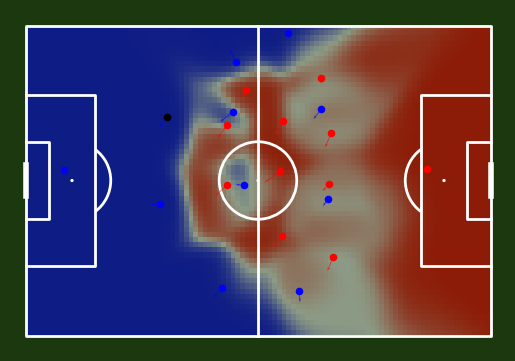

In [5]:
pc.plot_tensor_pitch_control(td_object=td_object, frame=300, version='Spearman', implementation='GL', fix_tti=True,
                            n_grid_points_x=100, n_grid_points_y=60)

Modelling pitch control...
Running Spearman's pitch control computation based on Gauss legendre quadration
Current batch: 1/2
Current batch: 2/2


(<Figure size 640x480 with 1 Axes>, <Axes: >)

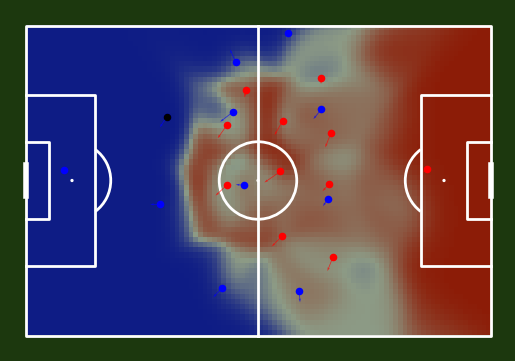

In [6]:
pc.plot_tensor_pitch_control(td_object=td_object, frame=300, version='Spearman', implementation='GL', fix_tti=False,
                            n_grid_points_x=100, n_grid_points_y=60)

Modelling pitch control...
Running pitch control computation based on Spearman's integration method
Current batch: 1/2
Current batch: 2/2


(<Figure size 640x480 with 1 Axes>, <Axes: >)

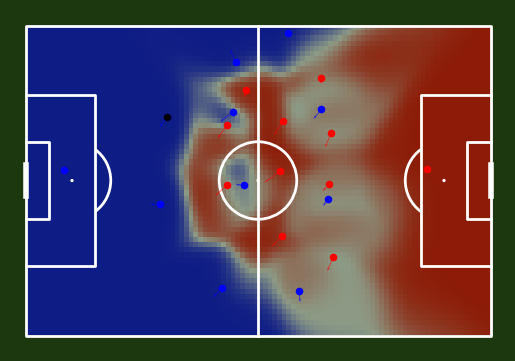

In [7]:
pc.plot_tensor_pitch_control(td_object=td_object, frame=300, version='Spearman', implementation='int', fix_tti=True,
                            n_grid_points_x=100, n_grid_points_y=60)

Modelling pitch control...
Running pitch control computation based on Spearman's integration method
Current batch: 1/2
Current batch: 2/2


(<Figure size 640x480 with 1 Axes>, <Axes: >)

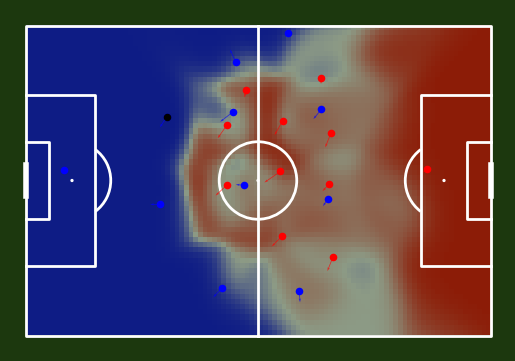

In [8]:
pc.plot_tensor_pitch_control(td_object=td_object, frame=300, version='Spearman', implementation='int', fix_tti=False,
                            n_grid_points_x=100, n_grid_points_y=60)

Modelling pitch control...
Current batch: 1/2
Current batch: 2/2


(<Figure size 640x480 with 1 Axes>, <Axes: >)

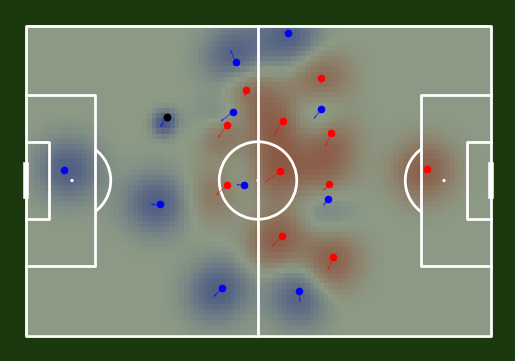

In [9]:
pc.plot_tensor_pitch_control(td_object=td_object, frame=300, version='Fernandez', implementation='org',
                            n_grid_points_x=100, n_grid_points_y=60)

Modelling pitch control...
Current batch: 1/2
Current batch: 2/2


(<Figure size 640x480 with 1 Axes>, <Axes: >)

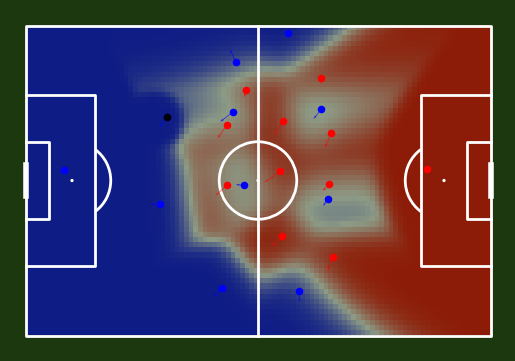

In [10]:
pc.plot_tensor_pitch_control(td_object=td_object, frame=300, version='Fernandez', implementation='adap',
                            n_grid_points_x=100, n_grid_points_y=60)

In [11]:
# random rescaling to test
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='myPitch',
                         x_range_pitch=(-50, 50), y_range_pitch=(0, 60))


Modelling pitch control...
Current batch: 1/2
Current batch: 2/2


(<Figure size 640x480 with 1 Axes>, <Axes: >)

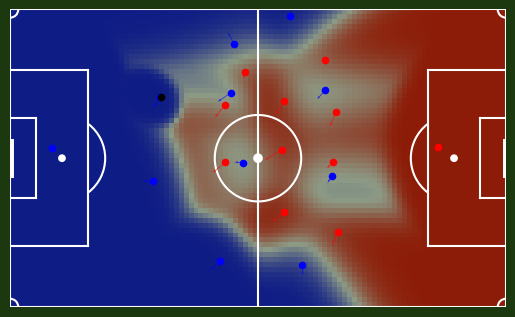

In [12]:
pc.plot_tensor_pitch_control(td_object=td_object, frame=300, version='Fernandez', implementation='adap',
                            n_grid_points_x=100, n_grid_points_y=60)

Modelling pitch control...
Current batch: 1/2
Current batch: 2/2


(<Figure size 640x480 with 1 Axes>, <Axes: >)

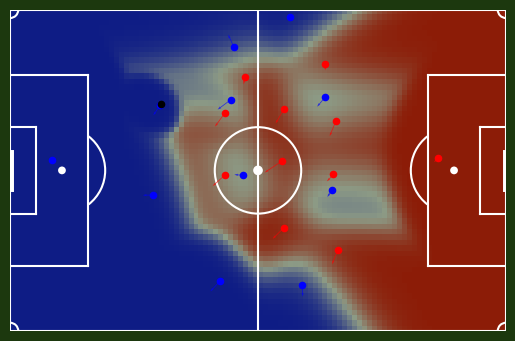

In [13]:
# random rescaling to test
td_object = tracking_data(td, data_source='metrica', scale_to_pitch='myPitch')
pc.plot_tensor_pitch_control(td_object=td_object, frame=300, version='Fernandez', implementation='adap',
                            n_grid_points_x=100, n_grid_points_y=60)

# Home vs Away